<a href="https://colab.research.google.com/github/PamelaMorsentti/Carrito-2023/blob/master/Consigna_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

# Ruta del archivo de la base de datos
ruta_base_datos = 'netflix_oscar.db'

# Verificar si el archivo existe
if os.path.exists(ruta_base_datos):
    print(f'El archivo {ruta_base_datos} existe en la ubicación especificada.')
else:
    print(f'No se encontró el archivo {ruta_base_datos}. Verifica la ruta.')

El archivo netflix_oscar.db existe en la ubicación especificada.


In [3]:
# Nombre del archivo de la base de datos
nombre_base_datos = 'netflix_oscar.db'

# Obtiene la ruta absoluta al directorio actual
ruta_actual = os.getcwd()

# Combina la ruta actual con el nombre del archivo de la base de datos
ruta_completa = os.path.join(ruta_actual, nombre_base_datos)

# Imprime la ruta completa al archivo de la base de datos
print(f'Ruta completa a la base de datos: {ruta_completa}')

Ruta completa a la base de datos: /content/netflix_oscar.db


In [4]:
import pandas as pd
import sqlite3 as sq3
import os

def get_connection(database_name='netflix_oscar.db'):
    conn = sq3.connect(database_name)
    cur = conn.cursor()
    return conn, cur

def close_connection(conn, cur):
    cur.close()
    conn.close()

In [7]:
import pandas as pd
import sqlite3

global conn, cur
database = './content/netflix_oscar.db' # buscar direccion de la base de datos
conn, cur = get_connection('netflix_oscar.db')

In [11]:
import sqlite3 as sq3

query_content = 'SELECT * FROM content'
df_content = pd.read_sql(query_content, conn)

close_connection(conn, cur)

In [12]:
s_conteo_nonull = df_content.count()
s_conteo_nonull

id_content       8745
type             8745
title_content    8745
director         6121
cast             7931
country          7921
date_added       8735
release_year     8745
rating           8738
duration         8745
listed_in        8745
description      8745
see_content      8745
dtype: int64

In [14]:
# df_content_nonull = pd.DataFrame(s_conteo_nonull, columns={'No Nulos'})
df_content_nonull = pd.DataFrame(s_conteo_nonull, columns=['No Nulos'])

display(df_content_nonull)
print()

,No Nulos
id_content,8745
type,8745
title_content,8745
director,6121
cast,7931
country,7921
date_added,8735
release_year,8745
rating,8738
duration,8745


In [ ]:
# ESTE CODIGO DA ERROR, FUE PARA MOSTRAR EL ERROR
df_content_nonull = pd.DataFrame(s_conteo_nonull.values, index=['No nulus'], columns=s_conteo_nonull.index)
display(df_content_nonull)
print()

# hay que usar reshape para que no de error
s_conteo_nonull.values.reshape(1,-1)

df_content_nonull = pd.DataFrame(s_conteo_nonull.values.reshape(1, -1), index=[
                                 'No nulus'], columns=s_conteo_nonull.index)
display(df_content_nonull)
print()

In [16]:
df_content_nonull = pd.DataFrame(s_conteo_nonull.values.reshape(1, -1), index=['No nulus'], columns=s_conteo_nonull.index)
display(df_content_nonull)
print()


,id_content,type,title_content,director,cast,country,date_added,release_year,rating,duration,listed_in,description,see_content
No nulus,8745,8745,8745,6121,7931,7921,8735,8745,8738,8745,8745,8745,8745


In [19]:
conn, cur = get_connection('netflix_oscar.db')

df_cont = pd.read_sql('SELECT * FROM content', conn)
df_prod = pd.read_sql('SELECT * FROM production', conn)
df_oscar = pd.read_sql('SELECT * FROM oscar', conn)

close_connection(conn, cur)

display(df_cont)
display(df_prod)
display(df_oscar)

cols = ['type', 'title_content', 'country', 'rating', 'duration', 'listed_in']

df_cont_2_c_i = df_cont[cols]
display(df_cont_2_c_i)

,id_content,type,title_content,director,cast,country,date_added,release_year,rating,duration,listed_in,description,see_content
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",1
1,2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",1
2,3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,4,TV Show,Jailbirds New Orleans,None,None,None,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,5,TV Show,Kota Factory,None,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8740,8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",1
8741,8804,TV Show,Zombie Dumb,None,None,None,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",1
8742,8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,1
8743,8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",1


,id_production,id_content,title_production,genre,premiere,runtime,imdb_score,language,see_production
0,1,1,Dick Johnson Is Dead,Documentary,"October 2, 2020",90,7.5,English,1
1,2,1093,Dolly Parton: A MusiCares Tribute,Documentary,"April 7, 2021",55,6.5,English,1
2,3,1071,Why Did You Kill Me?,Documentary,"April 14, 2021",83,5.6,English,1
3,4,142,Extraction,Action,"April 24, 2020",117,6.7,English,1
4,5,3988,Antoine Griezmann: The Making of a Legend,Documentary,"March 21, 2019",60,6.5,French,1
...,...,...,...,...,...,...,...,...,...
546,557,4177,Fyre: The Greatest Party That Never Happened,Documentary,"January 18, 2019",97,7.2,English,1
547,558,5041,Love per Square Foot,Romantic comedy,"February 14, 2018",133,7.2,Hindi,1
548,559,1873,The 40-Year-Old Version,Comedy,"October 9, 2020",124,7.2,English,1
549,561,4708,Zion,Documentary,"August 10, 2018",11,7.2,English,1


,id_oscar,id_inf,id_res,id_content,title_oscar,year_ceremony,category,name,winner,directed_by,...,starring,distributed_by,budget,budget_x_million,box_office,box_office_x_million,imdb,metascore,rotten_tomatoes,see_oscar
0,1,26,10359,NaN,1917,2020,CINEMATOGRAPHY,Roger Deakins,1,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
1,2,26,10368,NaN,1917,2020,DIRECTING,Sam Mendes,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
2,3,26,10395,NaN,1917,2020,MAKEUP AND HAIRSTYLING,Naomi Donne. Tristan Versluis and Rebecca Cole,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
3,4,26,10399,NaN,1917,2020,MUSIC (Original Score),Thomas Newman,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
4,5,26,10412,NaN,1917,2020,BEST PICTURE,Sam Mendes. Pippa Harris. Jayne-Ann Tenggren a...,0,Sam Mendes,...,['George MacKay'. 'Dean-Charles Chapman'. 'Mar...,['Universal Pictures (Worldwide)'. 'Entertainm...,$95 million,95.0,$384.9 million,384.9,8.3,78.0,89.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2753,2754,77,4311,NaN,Zootopia,1966,MUSIC (Music Score--substantially original),Maurice Jarre,1,['Byron Howard'. 'Rich Moore'],...,['Ginnifer Goodwin'. 'Jason Bateman'. 'Idris E...,['Walt Disney Studios'. 'Motion Pictures'],$150 million,150.0,$1.024 billion,1024.0,8.0,78.0,98.0,1
2754,2755,77,4326,NaN,Zootopia,1966,BEST PICTURE,Carlo Ponti. Producer,0,['Byron Howard'. 'Rich Moore'],...,['Ginnifer Goodwin'. 'Jason Bateman'. 'Idris E...,['Walt Disney Studios'. 'Motion Pictures'],$150 million,150.0,$1.024 billion,1024.0,8.0,78.0,98.0,1
2755,2756,77,4339,NaN,Zootopia,1966,SOUND,Metro-Goldwyn-Mayer British Studio Sound Depar...,0,['Byron Howard'. 'Rich Moore'],...,['Ginnifer Goodwin'. 'Jason Bateman'. 'Idris E...,['Walt Disney Studios'. 'Motion Pictures'],$150 million,150.0,$1.024 billion,1024.0,8.0,78.0,98.0,1
2756,2757,77,4349,NaN,Zootopia,1966,WRITING (Screenplay--based on material from an...,Robert Bolt,1,['Byron Howard'. 'Rich Moore'],...,['Ginnifer Goodwin'. 'Jason Bateman'. 'Idris E...,['Walt Disney Studios'. 'Motion Pictures'],$150 million,150.0,$1.024 billion,1024.0,8.0,78.0,98.0,1


,type,title_content,country,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,United States,PG-13,90 min,Documentaries
1,TV Show,Blood & Water,South Africa,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,None,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,None,TV-MA,1 Season,"Docuseries, Reality TV"
4,TV Show,Kota Factory,India,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...,...,...,...,...
8740,Movie,Zodiac,United States,R,158 min,"Cult Movies, Dramas, Thrillers"
8741,TV Show,Zombie Dumb,None,TV-Y7,2 Seasons,"Kids TV, Korean TV Shows, TV Comedies"
8742,Movie,Zombieland,United States,R,88 min,"Comedies, Horror Movies"
8743,Movie,Zoom,United States,PG,88 min,"Children & Family Movies, Comedies"


In [20]:
cols2 = ['id_content', 'type', 'title_content', 'director', 'cast', 'rating', 'duration', 'listed_in']
df_cont_ii = df_cont[cols].fillna('')
condicion = (df_cont_ii['country'].str.contains ('Argentina'))
df_cont_ii = df_cont_ii[condicion]
df_cont_ii.drop(columns='country', inplace=True)

display(df_cont_ii)

,type,title_content,rating,duration,listed_in
139,Movie,"El patrón, radiografía de un crimen",TV-MA,100 min,"Dramas, International Movies, Thrillers"
272,TV Show,The Kingdom,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis..."
299,Movie,Esperando la carroza 2,TV-MA,88 min,"Comedies, Cult Movies, International Movies"
301,Movie,Tango Feroz,TV-MA,124 min,"Classic Movies, Dramas, International Movies"
430,TV Show,Okupas,TV-MA,1 Season,"Classic & Cult TV, Crime TV Shows, Internation..."
...,...,...,...,...,...
7744,TV Show,Psiconautas,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh..."
8105,Movie,Temporada de Caza,TV-MA,108 min,"Dramas, International Movies"
8127,Movie,The Aerial,TV-MA,99 min,"Dramas, International Movies, Sci-Fi & Fantasy"
8214,Movie,The Desert Bride,TV-14,78 min,"Dramas, International Movies"


In [22]:
print(df_prod.columns)


Index(['id_production', 'id_content', 'title_production', 'genre', 'premiere',
       'runtime', 'imdb_score', 'language', 'see_production'],
      dtype='object')


In [23]:
cols3 = ['id_production', 'title_production', 'genre', 'language', 'imdb_score']
condicion2 = (df_prod.imdb_score > 7.5)
df_prod_iii = df_prod.loc[condicion2, cols3]
display(df_prod_iii)

,id_production,title_production,genre,language,imdb_score
33,34,Seaspiracy,Documentary,English,8.2
84,86,If Anything Happens I Love You,Animation / Short,English,7.8
88,90,Ludo,Anthology/Dark comedy,Hindi,7.6
105,107,The Trial of the Chicago 7,Drama,English,7.8
108,110,The Three Deaths of Marisela Escobedo,Documentary,Spanish,8.2
112,114,David Attenborough: A Life on Our Planet,Documentary,English,9.0
128,130,The Social Dilemma,Documentary,English,7.6
129,131,My Octopus Teacher,Documentary,English,8.1
160,163,Athlete A,Documentary,English,7.6
183,186,A Secret Love,Documentary,English,7.9


In [26]:
cols4 = ['id_production', 'title_production', 'runtime', 'language']
condicion3 = (df_prod.runtime > 90) & (df_prod.language == 'French')
df_prod_iv = df_prod.loc[condicion3, cols4].sort_values('title_production')
display(df_prod_iv)

,id_production,title_production,runtime,language
145,147,Anelka: Misunderstood,94,French
536,544,Bigflo & Oil: Hip Hop Frenzy,100,French
122,124,GIMS: On the Record,96,French
519,525,I Am Not an Easy Man,98,French
164,167,Lost Bullet,92,French
28,29,Madame Claude,112,French
11,12,Oxygen,101,French
94,96,Rogue City,116,French
248,251,Street Flow,96,French
45,46,The Misadventures of Hedi and Cokeman,99,French


In [27]:
# csv_path = '/work/data/CSV/set_total.csv'
csv_path = '/content/set_total.csv'
df_set_total = pd.read_csv(csv_path)

In [28]:
display(f'{df_set_total.index.size} registros')
display(f'De los reggistros {df_set_total.duplicated().sum()} son registros duplicados')
df_set_total.drop_duplicates(inplace=True)
display(f'{df_set_total.index.size} registros')

'11427 registros'

'De los reggistros 2 son registros duplicados'

'11425 registros'

In [29]:
print(df_set_total.dtypes)

df_set_total_d_ii = df_set_total.copy()

# modificacion
df_set_total_d_ii.id_content = df_set_total_d_ii.id_content.fillna(0).astype(int)
df_set_total_d_ii.release_year = df_set_total_d_ii.release_year.fillna(
    0).astype(int)
df_set_total_d_ii.runtime = df_set_total_d_ii.runtime.fillna(0).astype(int)
df_set_total_d_ii.imdb_score = df_set_total_d_ii.imdb_score.fillna(
    0).astype(int)
df_set_total_d_ii.year_ceremony = df_set_total_d_ii.year_ceremony.fillna(
    0).astype(int)
df_set_total_d_ii.winner = df_set_total_d_ii.winner.fillna(
    0).astype(int)
df_set_total_d_ii.budget_x_million = df_set_total_d_ii.budget_x_million.fillna(
    0).astype(int)

display(df_set_total_d_ii.dtypes)

id_content              float64
type                     object
title_content            object
release_year            float64
cast                     object
director                 object
country                  object
rating                   object
duration                 object
listed_in                object
runtime                 float64
imdb_score              float64
language                 object
title_oscar              object
category                 object
name                     object
year_ceremony           float64
winner                  float64
directed_by              object
starring                 object
budget_x_million        float64
box_office_x_million    float64
imdb                    float64
dtype: object


id_content                int64
type                     object
title_content            object
release_year              int64
cast                     object
director                 object
country                  object
rating                   object
duration                 object
listed_in                object
runtime                   int64
imdb_score                int64
language                 object
title_oscar              object
category                 object
name                     object
year_ceremony             int64
winner                    int64
directed_by              object
starring                 object
budget_x_million          int64
box_office_x_million    float64
imdb                    float64
dtype: object

type
Movie      6084
TV Show    2661
Name: type, dtype: int64

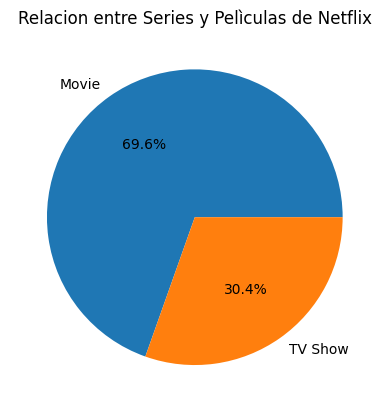

In [32]:
import matplotlib.pyplot as plt

s_conteo_tipo = df_cont.groupby('type')['type'].count()
display(s_conteo_tipo)

# plt.pie(s_conteo_tipo.values, labels=s_conteo_tipo.index, autopct=('%0.2%%'))
# plt.pie(s_conteo_tipo.values, labels=s_conteo_tipo.index, autopct='{:.2%}')
plt.pie(s_conteo_tipo.values, labels=s_conteo_tipo.index, autopct='%1.1f%%')


plt.title('Relacion entre Series y Pelìculas de Netflix')
plt.show()

In [ ]:
#  DA ERROR, USAR EL SIGUIENTE
cols = ['country', 'type']
condicion = (df_cont.country.notnull())
df_titulos_pais = df_cont.loc(condicion, cols)
condicion = ~(df_titulos_pais.country.str.contains(','))  # usar simbolo de NOT
df_titulos_pais = df_titulos_pais(condicion)
display(df_titulos_pais)

df_titulos_pais_2 = df_titulos_pais.groupby(['country', 'type']).type.count().unstack().fillna(0).astype(int)
df_titulos_pais_2['Total'] = df_titulos_pais_2['Movie'] + df_titulos_pais_2 ['Tv Shows']
df_titulos_pais_2.sort_values['Total', ascending=False, inplace=True]
df_titulos_pais_2 = df_titulos_pais_2.head(10)
# df_titulos_pais_2

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.barh(df_titulos_pais_2.index, df_titulos_pais_2.Movie, label='Movie')
ax.barh(df_titulos_pais_2.index, df_titulos_pais_2['TV Show'], label='TV Show', left=df_titulos_pais_2.Movie)
ax.bar_label(ax.containers[1])
ax.set_xlim(0,df_titulos_pais_2.Total.max() * 1.1)
ax.set_title('Cantidad de Títulos por Tipo de Contenido en los 10 Países Principales')
ax.legend(loc='best')

plt.show()

,country,type
0,United States,Movie
1,South Africa,TV Show
4,India,TV Show
8,United Kingdom,TV Show
9,United States,Movie
...,...,...
8738,Pakistan,TV Show
8740,United States,Movie
8742,United States,Movie
8743,United States,Movie


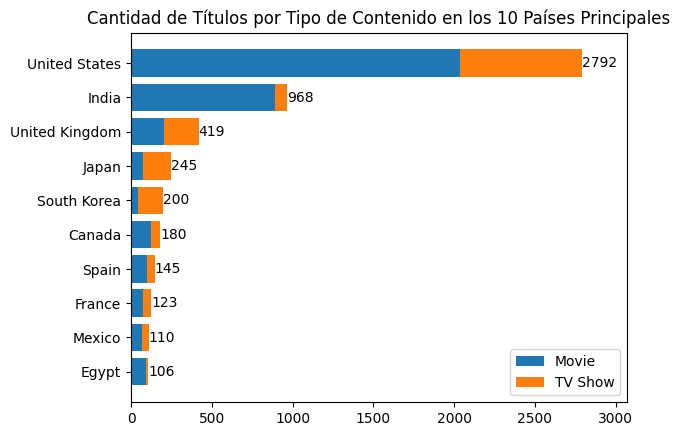

In [34]:
cols = ['country', 'type']
condicion = (df_cont.country.notnull())
df_titulos_pais = df_cont.loc[condicion, cols]
condicion = ~(df_titulos_pais.country.str.contains(','))  # usar símbolo de NOT
df_titulos_pais = df_titulos_pais[condicion]
display(df_titulos_pais)

df_titulos_pais_2 = df_titulos_pais.groupby(['country', 'type']).type.count().unstack().fillna(0).astype(int)
df_titulos_pais_2['Total'] = df_titulos_pais_2['Movie'] + df_titulos_pais_2['TV Show']
df_titulos_pais_2.sort_values(by='Total', ascending=False, inplace=True)
df_titulos_pais_2 = df_titulos_pais_2.head(10)

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.barh(df_titulos_pais_2.index, df_titulos_pais_2.Movie, label='Movie')
ax.barh(df_titulos_pais_2.index, df_titulos_pais_2['TV Show'], label='TV Show', left=df_titulos_pais_2.Movie)
ax.bar_label(ax.containers[1])
ax.set_xlim(0, df_titulos_pais_2.Total.max() * 1.1)
ax.set_title('Cantidad de Títulos por Tipo de Contenido en los 10 Países Principales')
ax.legend(loc='best')

plt.show()


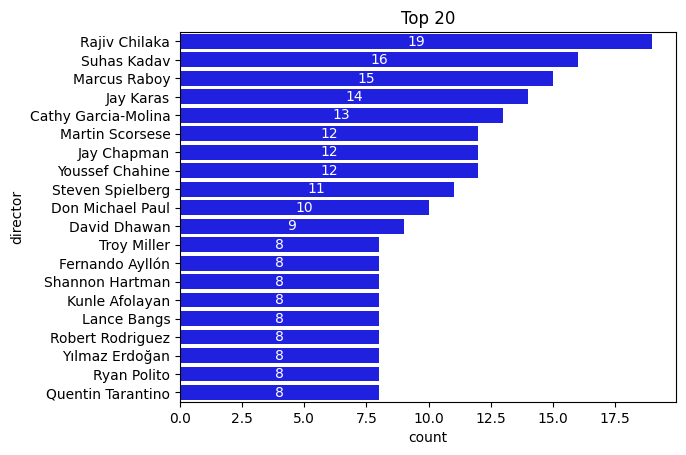

In [39]:
# top 20 directores con mas produccion

import seaborn as sns

cols = ['director']
condicion = (df_cont['director'].notnull())
df_tit_x_dir = df_cont.loc[condicion, cols].copy()

condicion = ~ (df_tit_x_dir['director'].str.contains(','))
df_tit_x_dir = df_tit_x_dir[condicion]

# display(df_cont)
# display(df_tit_x_dir) # 6121 contenidos

s_conteo_dir = df_tit_x_dir.groupby('director')['director'].count().sort_values(ascending=False).head(20) # el conteo da 3960 directores unicos

# filtrar contenidos s/ director esta en el top 20
condicion = df_tit_x_dir['director'].isin(s_conteo_dir.index)
df_graf = df_tit_x_dir[condicion] # quedan 215 son contenidos cuyo director esta en el top 20
# df_graf

fig, ax = plt.subplots()
# sns.countplot(data=df_tit_x_dir, y='director') # con esto ya cuento las directores
sns.countplot(data=df_graf, y='director', color='blue', order=s_conteo_dir.index)

ax.bar_label(ax.containers[0], label_type='center', c='w')
ax.set_title('Top 20')

plt.show()
# 5533 elementos


In [41]:
# tabla content
col = ['listed_in']
condicion = (df_cont['listed_in'].notnull())
df_tit_x_listed  = df_cont.loc[condicion, col]
df_tit_x_listed

s_cont_listed = df_tit_x_listed.groupby('listed_in')['listed_in'].count().sort_values(ascending=False)
s_cont_listed

# tabla produccion
col = ['genre']
condicion = (df_cont['genre'].notnull())
df_tit_x_genre  = df_prod.loc[condicion, col]
df_tit_x_genre

s_cont_genre = df_tit_x_genre.groupby('genre')['genre'].count().sort_values(ascending=False).head(20)
s_cont_genre

fig.ax = plt.subplots()
ax.set_title('Top 20 generos')
ax.set_xlim(0, s_cont_genre(------------------))
sns.barplot(x=s_cont_genre.index, y=s_cont_genre.values, color='g')
ax.bar_label(ax.containers[0], label_type='edge', c='b')
ax.set_xlabel('Titulos')

SyntaxError: ignored